In [2]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set_theme()
%matplotlib inline

In [3]:
#read in df
housing = pd.read_csv("ames_house_cleaned.csv")
housing.head()

,Unnamed: 0,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
0,1,909176150,126000,1-STORY 1945 & OLDER,RL,60,7890,2,0,4,Lvl,4,Corner,1,Southwest of ISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,3,3,CBlock,3,3,1,3,1,618,GasA,3,Y,SBrkr,2,1,3,4,8,1,4,Detchd,1939,1,2,399,3,3,2,0,0,No Misc,0,Mar,2010,Warranty Deed,Normal,1,71,1,11.744037,2.0,1094,166,0
1,2,905476230,139500,1-STORY PUD 1946 & NEWER,RL,42,4235,2,0,4,Lvl,4,Inside,1,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149,4,3,CBlock,4,3,2,6,5,104,GasA,3,Y,SBrkr,2,1,4,5,8,0,0,Attchd,1984,3,1,266,3,3,2,0,0,No Misc,0,Feb,2009,Warranty Deed,Normal,1,26,0,11.845820,3.0,1994,105,0
2,3,911128020,124900,1-STORY 1945 & OLDER,C (all),60,6060,2,0,4,Lvl,4,Inside,1,"Iowa DOT,Rail Road",Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0,4,3,BrkTil,3,3,1,5,1,100,GasA,5,Y,SBrkr,2,1,4,5,8,0,0,Detchd,1930,1,1,216,3,1,0,0,0,No Misc,0,Nov,2007,Warranty Deed,Normal,1,80,1,11.735269,1.0,1738,282,0
3,4,535377150,114000,2-STORY 1945 & OLDER,RL,80,8146,2,0,4,Lvl,4,Corner,1,Old Town,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0,4,4,BrkTil,2,3,1,1,1,405,GasA,4,Y,SBrkr,2,1,3,6,8,0,0,Detchd,1940,1,1,281,3,3,0,0,0,No Misc,0,May,2009,Warranty Deed,Normal,2,110,1,11.643954,1.0,1039,279,0
4,5,534177230,227000,2-STORY 1946 & NEWER,RL,70,8400,2,0,4,Lvl,4,Inside,1,Northwest Ames,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0,4,3,PConc,4,3,1,6,1,167,GasA,5,Y,SBrkr,3,1,4,6,8,0,0,Attchd,2001,3,2,528,3,3,2,0,0,No Misc,0,Nov,2009,Warranty Deed,Normal,2,9,0,12.332705,3.5,2308,45,0


In [4]:
#Target variables
house_price = housing.SalePrice
log_price = housing.LogPrice

In [5]:
X = housing.drop(['Unnamed: 0','PID', 'SalePrice', 'LogPrice'],axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
0,1-STORY 1945 & OLDER,RL,60,7890,2,0,4,Lvl,4,Corner,1,Southwest of ISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,3,3,CBlock,3,3,1,3,1,618,GasA,3,Y,SBrkr,2,1,3,4,8,1,4,Detchd,1939,1,2,399,3,3,2,0,0,No Misc,0,Mar,2010,Warranty Deed,Normal,1,71,1,2.0,1094,166,0
1,1-STORY PUD 1946 & NEWER,RL,42,4235,2,0,4,Lvl,4,Inside,1,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149,4,3,CBlock,4,3,2,6,5,104,GasA,3,Y,SBrkr,2,1,4,5,8,0,0,Attchd,1984,3,1,266,3,3,2,0,0,No Misc,0,Feb,2009,Warranty Deed,Normal,1,26,0,3.0,1994,105,0
2,1-STORY 1945 & OLDER,C (all),60,6060,2,0,4,Lvl,4,Inside,1,"Iowa DOT,Rail Road",Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0,4,3,BrkTil,3,3,1,5,1,100,GasA,5,Y,SBrkr,2,1,4,5,8,0,0,Detchd,1930,1,1,216,3,1,0,0,0,No Misc,0,Nov,2007,Warranty Deed,Normal,1,80,1,1.0,1738,282,0
3,2-STORY 1945 & OLDER,RL,80,8146,2,0,4,Lvl,4,Corner,1,Old Town,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0,4,4,BrkTil,2,3,1,1,1,405,GasA,4,Y,SBrkr,2,1,3,6,8,0,0,Detchd,1940,1,1,281,3,3,0,0,0,No Misc,0,May,2009,Warranty Deed,Normal,2,110,1,1.0,1039,279,0
4,2-STORY 1946 & NEWER,RL,70,8400,2,0,4,Lvl,4,Inside,1,Northwest Ames,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0,4,3,PConc,4,3,1,6,1,167,GasA,5,Y,SBrkr,3,1,4,6,8,0,0,Attchd,2001,3,2,528,3,3,2,0,0,No Misc,0,Nov,2009,Warranty Deed,Normal,2,9,0,3.5,2308,45,0


In [5]:
# #focus on key features
# X = housing[[
#     'TotalLivArea','TotalOutdoorSF','MasVnrArea','LotFrontage',
#     'LotArea','GarageArea','BedroomAbvGr','TotRmsAbvGrd',
#     'AllBathrooms','GarageCars','LotShape','YearBuilt',
#     'YearRemodAdd','HouseAge','OverallQual','ExterQual','BsmtQual',
#     'OverallCond','FireplaceQu','KitchenQual','SaleCondition',
#     'Neighborhood','YrSold','CentralAir','Fireplaces',
#     'MSSubClass','MSZoning'
# ]]

# X.head()

In [6]:
#isolate cat variables
feats_to_encode = X.columns[X.dtypes==object].tolist() 

In [7]:
feats_to_encode

['MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [8]:
#label encoding
labelencoder = LabelEncoder()

for i in feats_to_encode:
    X[i+"_Encoded"] = labelencoder.fit_transform(X[i])

X.drop(feats_to_encode,axis=1,inplace=True)
X.head()

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscVal,YrSold,NumbrFlrs,HouseAge,Remodeled,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool,MSSubClass_Encoded,MSZoning_Encoded,LandContour_Encoded,LotConfig_Encoded,Neighborhood_Encoded,Condition1_Encoded,Condition2_Encoded,BldgType_Encoded,HouseStyle_Encoded,RoofStyle_Encoded,RoofMatl_Encoded,Exterior1st_Encoded,Exterior2nd_Encoded,MasVnrType_Encoded,Foundation_Encoded,Heating_Encoded,CentralAir_Encoded,Electrical_Encoded,GarageType_Encoded,MiscFeature_Encoded,MoSold_Encoded,SaleType_Encoded,SaleCondition_Encoded
0,60,7890,2,0,4,4,1,6,6,1939,1950,0,3,3,3,3,1,3,1,618,3,2,1,3,4,8,1,4,1939,1,2,399,3,3,2,0,0,0,2010,1,71,1,2.0,1094,166,0,3,5,3,0,24,2,2,0,2,1,0,13,14,2,1,1,1,3,5,1,7,4,3
1,42,4235,2,0,4,4,1,5,5,1984,1984,149,4,3,4,3,2,6,5,104,3,2,1,4,5,8,0,0,1984,3,1,266,3,3,2,0,0,0,2009,1,26,0,3.0,1994,105,0,5,5,3,4,7,2,2,4,2,1,0,6,6,1,1,1,1,3,1,1,3,4,3
2,60,6060,2,0,4,4,1,5,9,1930,2007,0,4,3,3,3,1,5,1,100,5,2,1,4,5,8,0,0,1930,1,1,216,3,1,0,0,0,0,2007,1,80,1,1.0,1738,282,0,3,1,3,4,11,2,2,0,2,3,0,8,8,2,0,1,1,3,5,1,9,4,3
3,80,8146,2,0,4,4,1,4,8,1900,2003,0,4,4,2,3,1,1,1,405,4,2,1,3,6,8,0,0,1940,1,1,281,3,3,0,0,0,0,2009,2,110,1,1.0,1039,279,0,9,5,3,0,20,2,2,0,5,1,0,8,8,2,0,1,1,3,5,1,8,4,3
4,70,8400,2,0,4,4,1,8,6,2001,2001,0,4,3,4,3,1,6,1,167,5,3,1,4,6,8,0,0,2001,3,2,528,3,3,2,0,0,0,2009,2,9,0,3.5,2308,45,0,10,5,3,4,19,2,2,0,5,1,0,12,13,2,2,1,1,3,1,1,9,4,3


In [9]:
'''
function to score input model based
on the train and test targets
''' 

def model_score(model):
    model.fit(X_train,y_train)
    print('Train Score: ', model.score(X_train,y_train))
    print('Test Score: ', model.score(X_test,y_test))


In [10]:
'''
function to score input model based on the 
log of the train and test targets
'''
def log_score(model):
    model.fit(X_train_log,y_train_log)
    print('Log Train Score: ', model.score(X_train_log,y_train_log))
    print('Log Test Score: ', model.score(X_test_log,y_test_log))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, house_price, test_size=0.3, random_state=0)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, log_price, random_state=0, test_size=0.3)


In [12]:
#get score for RF model
forest = RandomForestRegressor()
forest.set_params(random_state=0)

model_score(forest)

Train Score:  0.9872324781728723
Test Score:  0.9171428601901539


In [13]:
#RMSE and MSE
rmse = np.sqrt(mean_squared_error(y_test,forest.predict(X_test)))
print(rmse)

20898.840488128208


In [14]:
#get log score for RF model
log_score(forest)

Log Train Score:  0.986224812060205
Log Test Score:  0.9181376248796207


In [15]:
print(forest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [16]:
#log RMSE and MSE
log_rmse = np.sqrt(mean_squared_error(y_test_log,forest.predict(X_test_log)))
print(log_rmse)

0.10938742300941123


In [17]:
forest_importances = pd.DataFrame(forest.feature_importances_, index=X.columns).reset_index().sort_values(by=0,ascending=False)
forest_importances.rename({'index':'Feature',0:'RF_Score'},inplace=True, axis=1)
forest_importances

,Feature,RF_Score
7,OverallQual,0.488992
43,TotalLivArea,0.268070
31,GarageArea,0.042846
1,LotArea,0.021595
19,BsmtUnfSF,0.013581
62,CentralAir_Encoded,0.013404
42,AllBathrooms,0.011625
40,HouseAge,0.010517
9,YearBuilt,0.009509
10,YearRemodAdd,0.009388


In [18]:
#log test score is slightly higher for RF model
#RMSE is lower for the log as well

In [21]:
#GridSearch
params = [{
    'n_estimators': [100,500,750,1000],
    'min_samples_split': [2,5,15,20],
    'bootstrap': [True, False],
    'max_depth' : [25,50],
    'criterion': ['mse'],
}]

grid_search_forest = GridSearchCV(forest, params, scoring='r2', cv=5, n_jobs=-1)

#model score
log_score(grid_search_forest)
#gridsearch rmse
np.sqrt(mean_squared_error(y_test_log,grid_search_forest.predict(X_test_log)))
#best parameters?
grid_search_forest.best_params_

Log Train Score:  0.9865534258999319
Log Test Score:  0.918854857963522


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 25,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [22]:
params2 = [{
    'n_estimators': [100,250,500],
    'min_samples_split': [3,5,10],
    'max_samples': [100,500,1000],
    'criterion': ['mse'],
}]

grid_search_forest = GridSearchCV(forest, params2, scoring='r2', cv=5, n_jobs=None )

#model score
log_score(grid_search_forest)
#gridsearch rmse
np.sqrt(mean_squared_error(y_test_log,grid_search_forest.predict(X_test_log)))
#best parameters?
grid_search_forest.best_params_

Log Train Score:  0.9667226854241118
Log Test Score:  0.9164326825003954


{'criterion': 'mse',
 'max_samples': 1000,
 'min_samples_split': 3,
 'n_estimators': 500}

In [29]:
params3 = [{
    'n_estimators': [500,1000,1500],
    'min_samples_split': [2,4,8],
    'max_samples': [100,500,1000],
    'min_samples_leaf': [1,2,3],
    'criterion': ['mse'],
}]

grid_search_forest = GridSearchCV(forest, params3, scoring='r2', cv=5, n_jobs=None )

#model score
log_score(grid_search_forest)
#gridsearch rmse
print('RMSE: ',np.sqrt(mean_squared_error(y_test_log,grid_search_forest.predict(X_test_log))))
#best parameters?
grid_search_forest.best_params_

Log Train Score:  0.9677815247912238
Log Test Score:  0.9165326247096364
RMSE:  0.11045454708172302


{'criterion': 'mse',
 'max_samples': 1000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [40]:
params4 = [{
    'n_estimators' : [1000,1250,1500],
    'criterion': ['mse'],  
    'max_samples': [1000,1200,1400],
    'min_samples_split': [2,6,12],
    'max_depth': [20,25,30]
}]

grid_search_forest = GridSearchCV(forest, params4, scoring='r2', cv=5, n_jobs=-1)

#model score
log_score(grid_search_forest)
#gridsearch rmse
print('RMSE: ',np.sqrt(mean_squared_error(y_test_log,grid_search_forest.predict(X_test_log))))
#best parameters?
grid_search_forest.best_params_

Log Train Score:  0.97962513900279
Log Test Score:  0.9183575010860959
RMSE:  0.10924042102249036


{'criterion': 'mse',
 'max_depth': 30,
 'max_samples': 1400,
 'min_samples_split': 2,
 'n_estimators': 1500}

[Text(0.5, 1.0, 'Random Forest Feature Importances')]

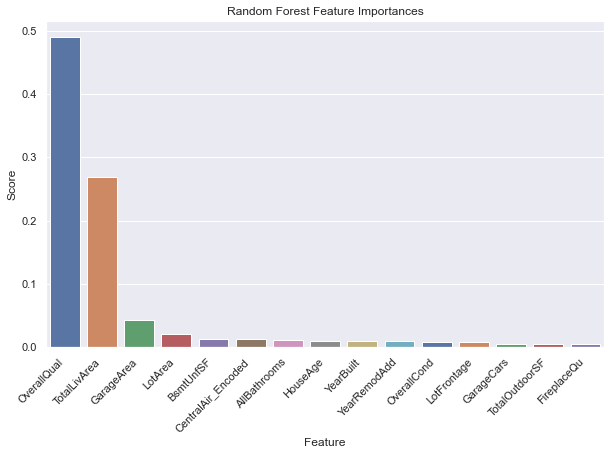

In [41]:
best_forest = grid_search_forest.best_estimator_
best_forest_importances = pd.DataFrame(best_forest.feature_importances_, index=X.columns).reset_index().sort_values(by=0,ascending=False)
best_forest_importances.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)

plt.rcParams['figure.figsize'] = 10,6
x=sns.barplot(x=best_forest_importances.Feature[:15], y=best_forest_importances.Score,palette='deep')
x.set_xticklabels(x.get_xticklabels(),rotation=45,horizontalalignment='right')
x.set(title='Random Forest Feature Importances')

# Boosted Modeling

In [12]:
# Importing LGBM and XGBOOST
import lightgbm as lgb
import xgboost as xgb

In [19]:
# create an xgboost regression model
xg_model = xgb.XGBRegressor()
xg_model.set_params(random_state=1,n_estimators=500)

model_score(xg_model)

Train Score:  0.9999999978487313
Test Score:  0.9065498102760553


In [20]:
rmse =np.sqrt(mean_squared_error(y_test,xg_model.predict(X_test)))
print(rmse)
print(xg_model.get_params())

22194.59967936998
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 500, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [34]:
log_score(xg_model)
rmse =np.sqrt(mean_squared_error(y_test_log,xg_model.predict(X_test_log)))
print(rmse)

Log Train Score:  0.9999890267451645
Log Test Score:  0.9263195244068285
0.10377707624144304


In [21]:
# create an xgboost regression model
lb_model = lgb.LGBMRegressor()
lb_model.set_params(random_state=1,n_estimators=500)

model_score(lb_model)
# print(lb_model.get_params())
rmse =np.sqrt(mean_squared_error(y_test,lb_model.predict(X_test)))
print(rmse)

Train Score:  0.9997862284899623
Test Score:  0.9133971378181318
21366.005957439724


In [17]:
log_score(lb_model)
rmse =np.sqrt(mean_squared_error(y_test_log,lb_model.predict(X_test_log)))
print(rmse)


Log Train Score:  0.9996879473902223
Log Test Score:  0.9338765009796298
0.09831123099793847


In [ ]:
lm = LinearRegression()
lb_model.set_params(random_state=1,n_estimators=500)
rmse =np.sqrt(mean_squared_error(y_test_log,lb_model.predict(X_test_log)))
print(rmse)
model_score(lb_model)
log_score(lb_model)
log_rmse =np.sqrt(mean_squared_error(y_test_log,lb_model.predict(X_test_log)))
print(log_rmse)

In [ ]:
# #gradient boost model
# gbm = GradientBoostingRegressor()
# gbm.set_params(random_state=1,n_estimators=500)

# score_model(gbm)

In [ ]:
# log_score(gbm)

In [ ]:
# rmse = np.sqrt(mean_squared_error(y_test,gbm.predict(X_test)))
# log_rmse = np.sqrt(mean_squared_error(y_test_log,gbm.predict(X_test_log)))
# print(rmse)
# print(log_rmse)

In [ ]:
# gbm_importances = pd.DataFrame(gbm.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
# gbm_importances.rename({'index':'Feature',0:'GBM_Score'},inplace=True, axis=1)
# gbm_importances

In [ ]:
# print(gbm.get_params())